<a href="https://colab.research.google.com/github/todnewman/coe_training/blob/master/Using_OpenCV_to_Classify_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Keras and OpenCV to Classify Images

Here we will take an trained Imagenet model and perform inference on an image we give the model.

**Author**: W. Tod Newman
##Learning Objectives

   *  Understand how to easly use OpenCV and Imagenet pretrained models in Keras
   *  Evaluate the way that these models classify known images
   *  Develop understanding of transfer learning and these models in particular.

## What is a pre-trained model?
A pre-trained model is trained on a different task than the task at hand but provides a very useful starting point because the features learned while training on the old task are useful for the new task.  To find these in keras go to https://keras.io/applications/

## What is Imagenet?
Imagenet is a project created to provide a large image database for research purposes. It contains more than 14 million images which belong to more than 20,000 classes. They also provide bounding box annotations for around 1 million images, which can be used in Object Localization tasks. 

## Pre-trained models already part of Keras
From the ImageNet Large Scale Visual Recognition Challenge  (ILSVRC)  many winning models have been open-sourced. 

These networks are trained for classifying images into one of 1000 categories or classes.

Keras comes bundled with many models. A trained model has two parts – Model Architecture and  Weights. The weights are large files and have to be automatically downloaded ( one-time ). For this example we'll focus on three architectures and we'll instantiate them with imagenet weights.

* VGG16.  A 16 Layer Convolutional Network created by Oxford's Visual Geometries Group that won ILSVRC in 2014.  https://arxiv.org/abs/1409.1556
* DenseNet 121.  A CNN with Dense Connections between layers.  https://arxiv.org/abs/1608.06993
* ResNet 50.  A 50 layer residual network.  https://arxiv.org/pdf/1512.03385.pdf

In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
from tensorflow.keras.applications import vgg16, resnet50, densenet
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
  
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')

# Load the DenseNet Model
densenet_model = densenet.DenseNet121(weights='imagenet')

# Clone the images repository
!git clone https://github.com/todnewman/images
%cd /content/images
!ls -l

33202176/33188688 [==============================] - 0s 0us/step
Cloning into 'images'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 34 (delta 4), reused 0 (delta 0), pack-reused 22
Unpacking objects: 100% (34/34), done.
/content/images
total 164
-rw-r--r-- 1 root root  8420 Aug 12 16:25  air-combat.jpg
-rw-r--r-- 1 root root 15223 Aug 12 16:25  bed-bugsalt.jpg
-rw-r--r-- 1 root root  9176 Aug 12 16:25  carrier.jpg
-rw-r--r-- 1 root root  3123 Aug 12 16:25  commercial_aircraft.jpg
-rw-r--r-- 1 root root  4283 Aug 12 16:25  dog.jpg
-rw-r--r-- 1 root root 17200 Aug 12 16:25 'finch from feeder.jpg'
-rw-r--r-- 1 root root 11361 Aug 12 16:25  goldfinch.jpg
-rw-r--r-- 1 root root 76868 Aug 12 16:25  molly.jpg
-rw-r--r-- 1 root root    35 Aug 12 16:25  README.md


In [2]:
# Here's a cool way to see the layers in the models.  Substitute the name of the model you're interested in
print (resnet_model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

# Function to predict the Image Class

Feed the processed image to the network and get the predictions. The image we got in the previous step should be normalized by subtracting the mean of the ImageNet data. This is because the network was trained on the images after this pre-processing. We follow the following steps to get the classification results.

1) **Preprocess** the input by subtracting the mean Imagenet RGB value from each channel of the images in the batch. This is done using the preprocess_input() function.

2) Get the classification result, which is a Tensor of dimension ( batchsize x 1000 ). This is done by model.predict() function.

3) Convert the result to human-readable labels – The vector obtained above has too many values to make any sense. Keras provides a function decode_predictions() which takes the classification results, sorts it according to the confidence of prediction and gets the class name ( instead of a class-number).The output shows the class ID, class name and the confidence of prediction.

In [3]:
# Small Function intended to walk through a dictionary made up of the keras 
# pre-trained models and the variables we define the models to be.

def predict_image(image, filename):
    
    model_dict = {vgg16:vgg_model, densenet:densenet_model, resnet50: resnet_model}
    model_names = {vgg16:'VGG 16', densenet:'DenseNet 121', resnet50:'Resnet 50'}
    df_temp = pd.DataFrame()
    f_arr, mod_arr, pred1, pred2, pred3, conf1, conf2, conf3 = [], [], [], [], [], [], [], []

    #
    # Loop through the models defined in model_dict above.
    #
    for k, v in model_dict.items():
  
        processed_image = k.preprocess_input(image.copy())
 
        # get the predicted probabilities for each class
        predictions = v.predict(processed_image)
        # print predictions
 
        # Convert the probabilities to class labels
        # Default is top 5 predictions, but the results are kind of messy, so I'm just showing top three.
        label = decode_predictions(predictions)
        for l in label:
            pred_1 = l[0][1]
            prob_1 = l[0][2]
            pred_2 = l[1][1]
            prob_2 = l[1][2]
            pred_3 = l[2][1]
            prob_3 = l[2][2]
        #
        # Capture predictions and likelihoods for display in a dataframe
        #
        f_arr.append(filename)
        mod_arr.append(model_names[k])
        pred1.append(pred_1)
        conf1.append(prob_1)
        pred2.append(pred_2)
        conf2.append(prob_2)
        pred3.append(pred_3)
        conf3.append(prob_3)

        # Uncomment the below if you want to see the top 5 labels
        #print(model_names[k], label)
    df_temp['Filename'] = f_arr
    df_temp['Model'] = mod_arr
    df_temp['Top Results'] = pred1
    df_temp['TR Confidence'] = conf1
    df_temp['Second Results'] = pred2
    df_temp['2nd Confidence'] = conf2
    df_temp['Third Results'] = pred3
    df_temp['3rd Confidence'] = conf3

    display(df_temp)


# Function to Process the image

Here is how to use keras functions for loading and pre-processing the image. Specificallly, we perform the following steps on an input image:

1) Load the image. Done using the load_img() function. Keras uses the PIL format for loading images. Thus, the image is in width x height x channels format.  If the image is rectangular, it will squish it down to this format. 
2) Convert the image from PIL format to Numpy format ( height x width x channels ) using image_to_array() function.  This allows us to do the next step...
3) The neural networks accept a 4-dimensional Tensor as an input of the form ( batchsize, height, width, channels). This is done using the expand_dims() function in Numpy.

**Images loaded:**
* air-combat.jpg  - an Australian F-35
* bed-bugsalt.jpg   - picture of multiple bed bugs
* commercial_aircraft.jpb  -  A commercial jet
* dog.jpg  - a cross between a Springer Spaniel and a Cocker Spaniel

In [4]:
def process_image(filename):
    # load an image in PIL format
    original = load_img(filename, target_size=(224, 224))  # Default image size for trained models

    # convert the PIL image to a numpy array
    # IN PIL - image is in (width, height, channel)
    # In Numpy - image is in (height, width, channel)
    numpy_image = img_to_array(original)
 
    # Convert the image / images into batch format
    # expand_dims will add an extra dimension to the data at a particular axis
    # We want the input matrix to the network to be of the form (batchsize, height, width, channels)
    # Thus we add the extra dimension to the axis 0.
    image_batch = np.expand_dims(numpy_image, axis=0)
    plt.imshow(np.uint8(image_batch[0]))
    plt.show()
    predict_image(image_batch, filename)

# MAIN function:  

Search the imgages directory (in CoLaboratory) for JPEG files. Then process all of them and classify the images using each of our three networks (VGG, Inception, Resnet 50).

./787.jpg


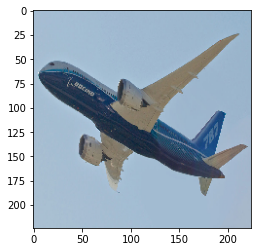

,Filename,Model,Top Results,TR Confidence,Second Results,2nd Confidence,Third Results,3rd Confidence
0,./787.jpg,VGG 16,airliner,0.572246,wing,0.191237,warplane,0.168402
1,./787.jpg,DenseNet 121,airliner,0.402501,space_shuttle,0.387983,wing,0.144087
2,./787.jpg,Resnet 50,airliner,0.522926,space_shuttle,0.252628,warplane,0.105759


./707.jpg


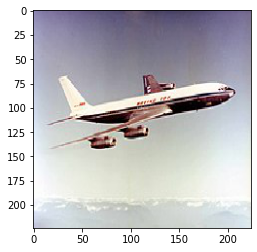

,Filename,Model,Top Results,TR Confidence,Second Results,2nd Confidence,Third Results,3rd Confidence
0,./707.jpg,VGG 16,warplane,0.466499,airliner,0.415092,wing,0.080029
1,./707.jpg,DenseNet 121,space_shuttle,0.513181,airliner,0.249548,warplane,0.123330
2,./707.jpg,Resnet 50,space_shuttle,0.580514,warplane,0.261657,airliner,0.071375


./737-1.jpg


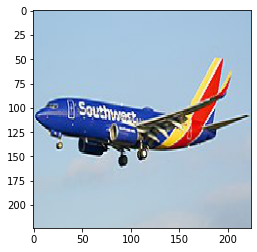

,Filename,Model,Top Results,TR Confidence,Second Results,2nd Confidence,Third Results,3rd Confidence
0,./737-1.jpg,VGG 16,airliner,0.527762,airship,0.255805,wing,0.186478
1,./737-1.jpg,DenseNet 121,airliner,0.894906,airship,0.051240,warplane,0.036134
2,./737-1.jpg,Resnet 50,airliner,0.990792,wing,0.007771,warplane,0.001139


./air-combat.jpg


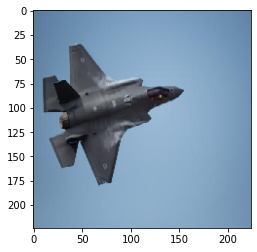

,Filename,Model,Top Results,TR Confidence,Second Results,2nd Confidence,Third Results,3rd Confidence
0,./air-combat.jpg,VGG 16,warplane,0.950017,wing,0.029029,projectile,0.010321
1,./air-combat.jpg,DenseNet 121,warplane,0.941692,wing,0.037430,space_shuttle,0.008363
2,./air-combat.jpg,Resnet 50,warplane,0.960023,wing,0.016242,space_shuttle,0.012942


./bed-bugsalt.jpg


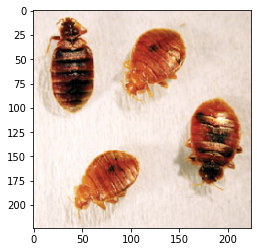

,Filename,Model,Top Results,TR Confidence,Second Results,2nd Confidence,Third Results,3rd Confidence
0,./bed-bugsalt.jpg,VGG 16,tick,0.944276,cockroach,0.036460,leaf_beetle,0.007026
1,./bed-bugsalt.jpg,DenseNet 121,isopod,0.539605,cockroach,0.241224,chiton,0.096712
2,./bed-bugsalt.jpg,Resnet 50,isopod,0.624855,cockroach,0.258684,trilobite,0.043264


./comet.jpg


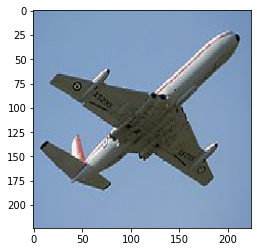

,Filename,Model,Top Results,TR Confidence,Second Results,2nd Confidence,Third Results,3rd Confidence
0,./comet.jpg,VGG 16,airliner,0.656109,wing,0.226706,warplane,0.071192
1,./comet.jpg,DenseNet 121,airliner,0.603977,space_shuttle,0.340045,warplane,0.035365
2,./comet.jpg,Resnet 50,airliner,0.969266,warplane,0.016211,wing,0.012790


./commercial_aircraft.jpg


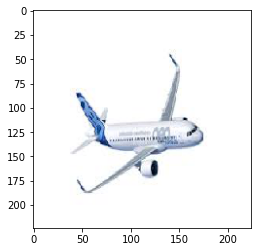

,Filename,Model,Top Results,TR Confidence,Second Results,2nd Confidence,Third Results,3rd Confidence
0,./commercial_aircraft.jpg,VGG 16,airliner,0.747420,space_shuttle,0.097044,wing,0.058704
1,./commercial_aircraft.jpg,DenseNet 121,airliner,0.488812,space_shuttle,0.438183,wing,0.021569
2,./commercial_aircraft.jpg,Resnet 50,airliner,0.750622,space_shuttle,0.222778,wing,0.011291


./tiger_shark.jpg


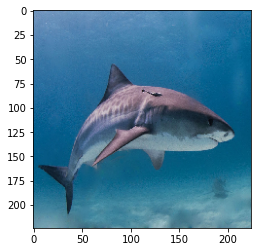

,Filename,Model,Top Results,TR Confidence,Second Results,2nd Confidence,Third Results,3rd Confidence
0,./tiger_shark.jpg,VGG 16,tiger_shark,0.992761,great_white_shark,0.007085,hammerhead,0.000132
1,./tiger_shark.jpg,DenseNet 121,tiger_shark,0.985402,great_white_shark,0.013763,hammerhead,0.000572
2,./tiger_shark.jpg,Resnet 50,tiger_shark,0.997826,great_white_shark,0.001784,hammerhead,0.000207


./carrier.jpg


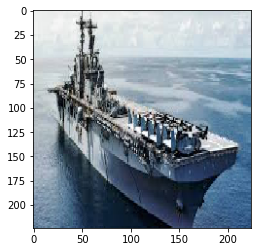

,Filename,Model,Top Results,TR Confidence,Second Results,2nd Confidence,Third Results,3rd Confidence
0,./carrier.jpg,VGG 16,aircraft_carrier,0.997233,dock,0.001175,drilling_platform,0.001145
1,./carrier.jpg,DenseNet 121,aircraft_carrier,0.985621,drilling_platform,0.008499,liner,0.001171
2,./carrier.jpg,Resnet 50,aircraft_carrier,0.950780,drilling_platform,0.043523,submarine,0.002427


./goldfinch.jpg


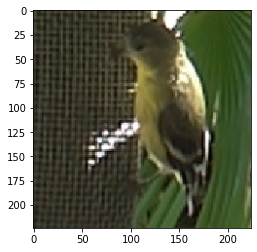

,Filename,Model,Top Results,TR Confidence,Second Results,2nd Confidence,Third Results,3rd Confidence
0,./goldfinch.jpg,VGG 16,kite,0.268820,hummingbird,0.230341,goldfinch,0.211882
1,./goldfinch.jpg,DenseNet 121,fox_squirrel,0.524635,goldfinch,0.158228,hare,0.026892
2,./goldfinch.jpg,Resnet 50,goldfinch,0.486466,coucal,0.247706,kite,0.057704


./sub.jpg


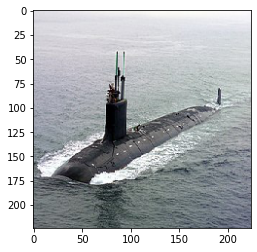

,Filename,Model,Top Results,TR Confidence,Second Results,2nd Confidence,Third Results,3rd Confidence
0,./sub.jpg,VGG 16,submarine,0.999998,breakwater,1.641659e-06,aircraft_carrier,1.250075e-07
1,./sub.jpg,DenseNet 121,submarine,0.999988,breakwater,7.483447e-06,aircraft_carrier,2.372975e-06
2,./sub.jpg,Resnet 50,submarine,1.000000,breakwater,5.055307e-13,wreck,4.109716e-13


./molly.jpg


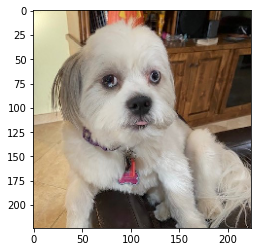

,Filename,Model,Top Results,TR Confidence,Second Results,2nd Confidence,Third Results,3rd Confidence
0,./molly.jpg,VGG 16,Lhasa,0.780120,Shih-Tzu,0.135740,Maltese_dog,0.057487
1,./molly.jpg,DenseNet 121,Lhasa,0.769418,Shih-Tzu,0.166345,Maltese_dog,0.038746
2,./molly.jpg,Resnet 50,Lhasa,0.542946,Maltese_dog,0.226823,Shih-Tzu,0.126623


./tank.jpg


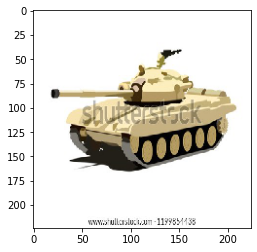

,Filename,Model,Top Results,TR Confidence,Second Results,2nd Confidence,Third Results,3rd Confidence
0,./tank.jpg,VGG 16,tank,0.909536,amphibian,0.043998,half_track,0.023547
1,./tank.jpg,DenseNet 121,tank,0.992549,half_track,0.004155,amphibian,0.002843
2,./tank.jpg,Resnet 50,tank,0.996155,amphibian,0.002605,half_track,0.000394


./finch from feeder.jpg


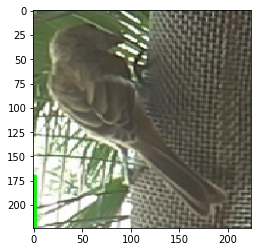

,Filename,Model,Top Results,TR Confidence,Second Results,2nd Confidence,Third Results,3rd Confidence
0,./finch from feeder.jpg,VGG 16,house_finch,0.341074,bulbul,0.092451,junco,0.067512
1,./finch from feeder.jpg,DenseNet 121,house_finch,0.350383,partridge,0.206702,window_screen,0.089693
2,./finch from feeder.jpg,Resnet 50,house_finch,0.739554,window_screen,0.094663,shopping_cart,0.015706


./dog.jpg


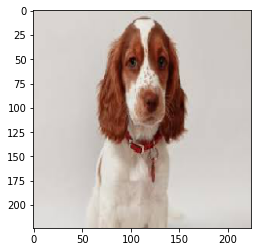

,Filename,Model,Top Results,TR Confidence,Second Results,2nd Confidence,Third Results,3rd Confidence
0,./dog.jpg,VGG 16,Welsh_springer_spaniel,0.978941,Sussex_spaniel,0.011244,cocker_spaniel,0.003250
1,./dog.jpg,DenseNet 121,Welsh_springer_spaniel,0.777279,Sussex_spaniel,0.065036,Brittany_spaniel,0.059646
2,./dog.jpg,Resnet 50,Welsh_springer_spaniel,0.713663,English_springer,0.221066,Sussex_spaniel,0.037540


./airbus320.jpg


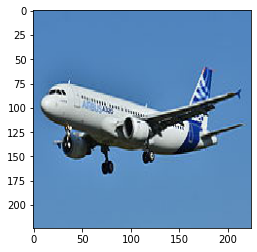

,Filename,Model,Top Results,TR Confidence,Second Results,2nd Confidence,Third Results,3rd Confidence
0,./airbus320.jpg,VGG 16,airliner,0.971886,wing,0.027804,warplane,0.000285
1,./airbus320.jpg,DenseNet 121,airliner,0.994640,wing,0.002373,warplane,0.001520
2,./airbus320.jpg,Resnet 50,airliner,0.996854,wing,0.002699,warplane,0.000325


./747.jpg


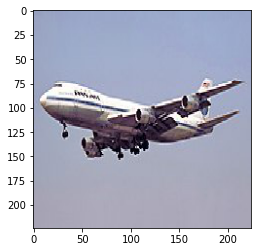

,Filename,Model,Top Results,TR Confidence,Second Results,2nd Confidence,Third Results,3rd Confidence
0,./747.jpg,VGG 16,airliner,0.647813,wing,0.179936,warplane,0.133481
1,./747.jpg,DenseNet 121,airliner,0.884128,warplane,0.088620,wing,0.012013
2,./747.jpg,Resnet 50,airliner,0.678968,warplane,0.155754,space_shuttle,0.147192


./airbus380.jpg


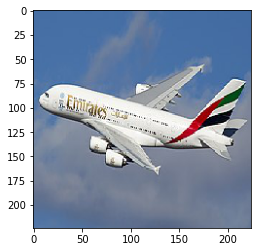

,Filename,Model,Top Results,TR Confidence,Second Results,2nd Confidence,Third Results,3rd Confidence
0,./airbus380.jpg,VGG 16,airliner,0.946429,wing,0.049998,warplane,0.003141
1,./airbus380.jpg,DenseNet 121,airliner,0.809076,wing,0.081893,space_shuttle,0.070724
2,./airbus380.jpg,Resnet 50,airliner,0.796359,warplane,0.073843,space_shuttle,0.071942


In [10]:
#  MAIN:  Look to see which .jpg files are loaded.  
#  Right now I'm just showing the top three predicted labels with their probabilities.

import os
directory = '/content/images'

for file in os.listdir(directory):
    if file.endswith(".jpg") or file.endswith(".png"):
        f = (os.path.join("./", file))
        print(f)
        # Now process the image we're working on
        process_image(f)

# Load extra images to test the Aircraft "invariant representation" performance

In [9]:
# Download an image from the internet
!wget -O /content/images/airbus380.jpg "https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/A6-EDY_A380_Emirates_31_jan_2013_jfk_%288442269364%29_%28cropped%29.jpg/300px-A6-EDY_A380_Emirates_31_jan_2013_jfk_%288442269364%29_%28cropped%29.jpg"
!wget -O /content/images/737-1.jpg "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/N730SW_737-7H4.jpg/220px-N730SW_737-7H4.jpg"
!wget -O /content/images/comet.jpg "https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/De_Havilland_DH-106_Comet_4C%2C_UK_-_Air_Force_AN1476165.jpg/220px-De_Havilland_DH-106_Comet_4C%2C_UK_-_Air_Force_AN1476165.jpg"
!wget -O /content/images/707.jpg "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Boeing_707_N68657_01.jpg/220px-Boeing_707_N68657_01.jpg"
!wget -O /content/images/747.jpg "https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Pan_Am_Boeing_747-121_N732PA_Bidini.jpg/220px-Pan_Am_Boeing_747-121_N732PA_Bidini.jpg"
!wget -O /content/images/airbus320.jpg "https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/Airbus_A320-200_Airbus_Industries_%28AIB%29_%22House_colors%22_F-WWBA_-_MSN_001_%2810276181983%29.jpg/220px-Airbus_A320-200_Airbus_Industries_%28AIB%29_%22House_colors%22_F-WWBA_-_MSN_001_%2810276181983%29.jpg"
!wget -O /content/images/787.jpg "https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Boeing_787_Dreamliner_arrival_Airventure_2011.jpg/1280px-Boeing_787_Dreamliner_arrival_Airventure_2011.jpg"
!wget -O /content/images/tiger_shark.jpg "https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Tiger_shark.jpg/1024px-Tiger_shark.jpg"
!wget -O /content/images/tank.jpg 'https://image.shutterstock.com/image-vector/vector-illustration-tank-450w-1199854438.jpg'
#!wget -O /content/images/ddg.jpg "https://www.secnav.navy.mil/ig/PublishingImages/The-Arleigh-Burke-class-guided-missile-destroyer-USS-Ross-DDG%2071.jpg"
!wget -O /content/images/sub.jpg "https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/US_Navy_040730-N-1234E-002_PCU_Virginia_%28SSN_774%29_returns_to_the_General_Dynamics_Electric_Boat_shipyard.jpg/300px-US_Navy_040730-N-1234E-002_PCU_Virginia_%28SSN_774%29_returns_to_the_General_Dynamics_Electric_Boat_shipyard.jpg"

--2022-08-12 16:31:24--  https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/A6-EDY_A380_Emirates_31_jan_2013_jfk_%288442269364%29_%28cropped%29.jpg/300px-A6-EDY_A380_Emirates_31_jan_2013_jfk_%288442269364%29_%28cropped%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12651 (12K) [image/jpeg]
Saving to: ‘/content/images/airbus380.jpg’

/content/images/air 100%[===================>]  12.35K  --.-KB/s    in 0s      

2022-08-12 16:31:24 (174 MB/s) - ‘/content/images/airbus380.jpg’ saved [12651/12651]

--2022-08-12 16:31:24--  https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/N730SW_737-7H4.jpg/220px-N730SW_737-7H4.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.

# Load new images

To load new images, use the below code.  It will allow you to load images from your own computer.  Otherwise, you'll be able to test with the default images. 

In [8]:
from google.colab import files

%cd /content/images
original = files.upload()
for fn in original.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(original[fn])))
!ls

/content/images


MessageError: ignored

# OpenCV Tutorials

### Experimental Section

Here are some techniques to segment out images in the hopes of improving classification accuracy.  This is in work.

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow
import numpy as np

!git clone https://github.com/todnewman/images
%cd /content/images
!ls -l
#reading the image 
#img = '/content/images/Saturday_08_June_2019_12:00:06PM.jpg'
img = '/content/images/finch from feeder.jpg'
image = cv2.imread(img)
edged = cv2.Canny(image, 10, 250)
cv2_imshow(edged)
cv2.waitKey(0)

#applying closing function 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)
cv2.waitKey(0)

#finding_contours 

cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(cnts)

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
cv2_imshow(image)

for (i, c) in enumerate(cnts):
    # draw the contour
    ((x, y), _) = cv2.minEnclosingCircle(c)
    cv2.putText(image, "#{}".format(i + 1), (int(x) - 10, int(y)),
        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
cv2_imshow(image)
cv2.waitKey(0)

In [ ]:
import cv2 
import os
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage


def watershed_segment(img):
    image = cv2.imread(img)
    
    spatial_radius = 5
    color_radius = 500
    
    #
    #   The output of this function is the filtered “posterized” image with 
    #   color gradients and fine-grain texture flattened
    #
    shifted = cv2.pyrMeanShiftFiltering(image,spatial_radius,color_radius)
    cv2_imshow(image)

    # convert the mean shift image to grayscale, then apply
    # Otsu's thresholding
    '''gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh)'''
    
    gray = cv2.cvtColor(shifted,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    cv2_imshow(thresh)

    # find contours in the thresholded image
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    print("[INFO] {} unique contours found".format(len(cnts)))

    # loop over the contours
    for (i, c) in enumerate(cnts):
        # draw the contour
        ((x, y), _) = cv2.minEnclosingCircle(c)
        cv2.putText(image, "#{}".format(i + 1), (int(x) - 10, int(y)),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
        cv2.drawContours(image, [c], -1, (0, 255, 0), 2)

    # show the output image
    cv2_imshow(image)
    
    # compute the exact Euclidean distance from every binary
    # pixel to the nearest zero pixel, then find peaks in this
    # distance map
    D = ndimage.distance_transform_edt(thresh)
    localMax = peak_local_max(D, indices=False, min_distance=20,
        labels=thresh)

    # perform a connected component analysis on the local peaks,
    # using 8-connectivity, then appy the Watershed algorithm
    markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
    labels = watershed(-D, markers, mask=thresh)
    print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

    # loop over the unique labels returned by the Watershed
    # algorithm
    for label in np.unique(labels):
        # if the label is zero, we are examining the 'background'
        # so simply ignore it
        if label == 0:
            continue

        # otherwise, allocate memory for the label region and draw
        # it on the mask
        mask = np.zeros(gray.shape, dtype="uint8")
        mask[labels == label] = 255

        # detect contours in the mask and grab the largest one
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # draw a circle enclosing the object
        ((x, y), r) = cv2.minEnclosingCircle(c)
        cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(image, (int(x), int(y)), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, "#{}".format(label), (int(x) - 10, int(y)),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    # show the output image
    cv2_imshow(image)
    cv2.waitKey(0)
    
    
directory = '/content/images'

for file in os.listdir(directory):
    if file.endswith(".jpg"):
        f = (os.path.join("./", file))
        watershed_segment(f)


In [ ]:
def watershed_2(img):
    image = cv2.imread(img)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=10)
    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)
    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)
    
    cv2_imshow(sure_bg)
    cv2_imshow(sure_fg)

    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)
    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1
    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0

    markers = cv2.watershed(image,markers)
    image[markers == -1] = [0,255,0]


    cv2_imshow(image)
    cv2.waitKey(0)
    
directory = '/content/images'

for file in os.listdir(directory):
    if file.endswith(".jpg"):
        f = (os.path.join("./", file))
        watershed_2(f)


In [ ]:
%ls

In [ ]:
%rm *.png

In [ ]:
%ls -lat


In [ ]:
from IPython.display import Image
Image('6.png')